In [46]:
import cv2
from transformers import pipeline
from PIL import Image
import requests
import torch 
import sys
sys.path.append("C:\\Users\\nxg05733\\Depth-Anything")
from depth_anything.dpt import DepthAnything
from depth_anything.util.transform import Resize, NormalizeImage, PrepareForNet
from torchvision.transforms import Compose
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

model = DepthAnything.from_pretrained("LiheYoung/depth_anything_vitl14")

transform = Compose([
        Resize(
            width=518,
            height=518,
            resize_target=False,
            keep_aspect_ratio=True,
            ensure_multiple_of=14,
            resize_method='lower_bound',
            image_interpolation_method=cv2.INTER_CUBIC,
        ),
        NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        PrepareForNet(),
    ])

In [47]:
image = Image.open("C:\\Users\\nxg05733\\RADIal\\resized_2\\images\\RECORD@2020-11-21_11.54.31\\RGB0.png")

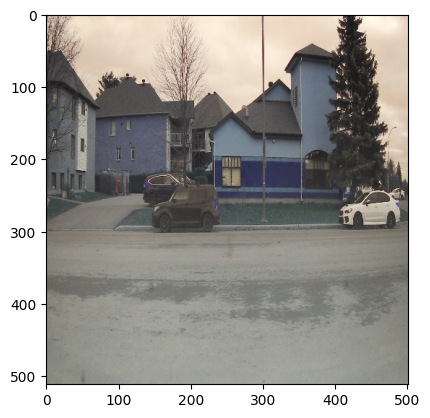

In [48]:
plt.imshow(image)

In [49]:
image = np.array(image) / 255.0
image = transform({'image': image})['image']
image = torch.from_numpy(image).unsqueeze(0)

depth = model(image)
depth = F.interpolate(depth[None], (512, 501), mode='bilinear', align_corners=False)[0, 0]

In [50]:
depth.shape

torch.Size([512, 501])

In [55]:
image_arr = depth.squeeze(0).detach().numpy()

image_arr_int = depth.squeeze(0).detach().numpy().astype(np.uint8)

In [58]:
image_arr_int[451:460,1:5]

array([[251, 251, 251, 251],
       [252, 252, 252, 252],
       [253, 253, 253, 253],
       [255, 255, 255, 254],
       [  0,   0,   0,   0],
       [  1,   1,   1,   1],
       [  2,   2,   2,   2],
       [  3,   3,   3,   3],
       [  5,   4,   4,   4]], dtype=uint8)

In [59]:
image_arr[451:460,1:5]

array([[251.62648, 251.6374 , 251.58293, 251.51006],
       [252.79813, 252.79657, 252.73404, 252.65678],
       [253.9582 , 253.94257, 253.8714 , 253.78984],
       [255.1261 , 255.09576, 255.01813, 254.93394],
       [256.3189 , 256.26932, 256.18518, 256.09866],
       [257.53125, 257.45935, 257.36694, 257.27646],
       [258.73892, 258.65475, 258.55658, 258.4607 ],
       [259.9003 , 259.8179 , 259.7134 , 259.61118],
       [261.0477 , 260.9735 , 260.86093, 260.74774]], dtype=float32)

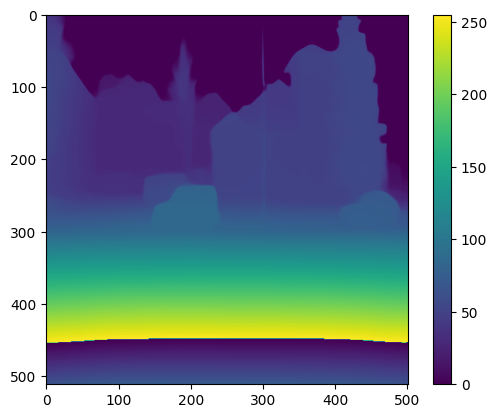

In [52]:
#image = cv2.imread("C:\\Users\\nxg05733\\Depth-Anything\\results2\\RADIAL_0.png")
image = np.load("depth_maps\RECORD@2020-11-21_11.54.31\Depth_0.npy")
#image = cv2.applyColorMap(image, cv2.COLORMAP_INFERNO)
""" cv2.imshow("Depth Map", image)
cv2.waitKey(0)
cv2.destroyAllWindows() """
plt.imshow(image, cmap='viridis')
plt.colorbar()
plt.show()

In [26]:
image.shape

(518, 924, 3)

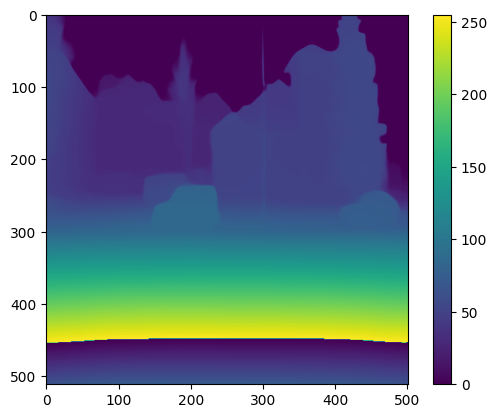

In [23]:
plt.imshow(image)
plt.colorbar()
plt.show()